In [1]:
import spotchaos.syntheticSignals as sp

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time
import tqdm
import pickle
from astropy.timeseries import LombScargle
from scipy.integrate import RK45, DOP853
from scipy.stats import chi2, iqr, poisson
from scipy.signal import argrelextrema, savgol_filter
from scipy.spatial.distance import chebyshev
from scipy.optimize import curve_fit, minimize
from scipy.special import factorial
from scipy import stats


# Rossler

[ 3.45344022 -1.10983499  0.07186731]


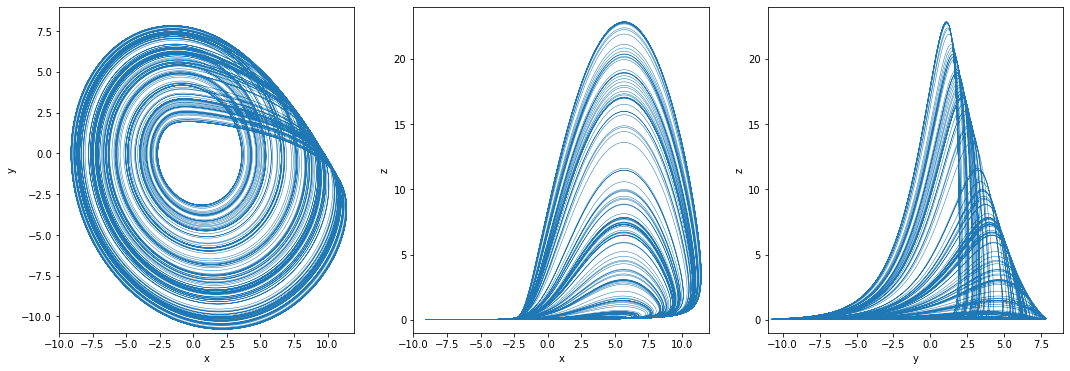

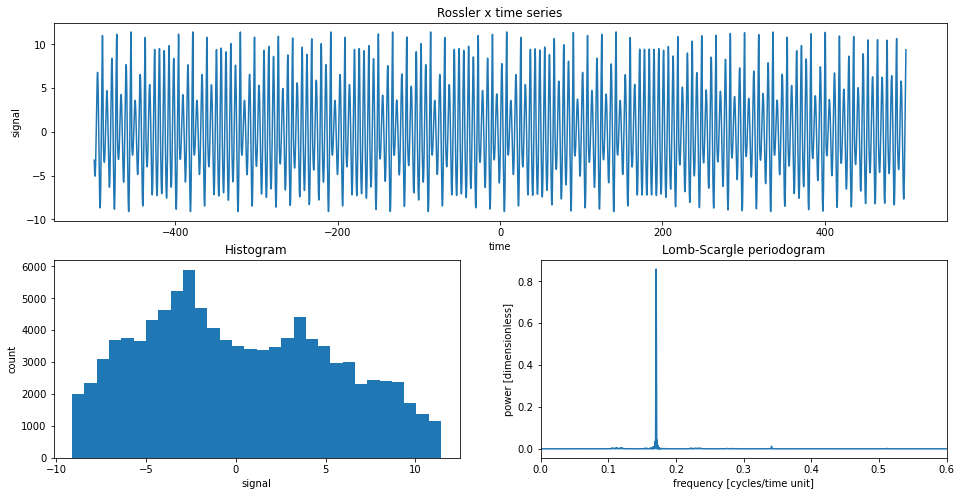

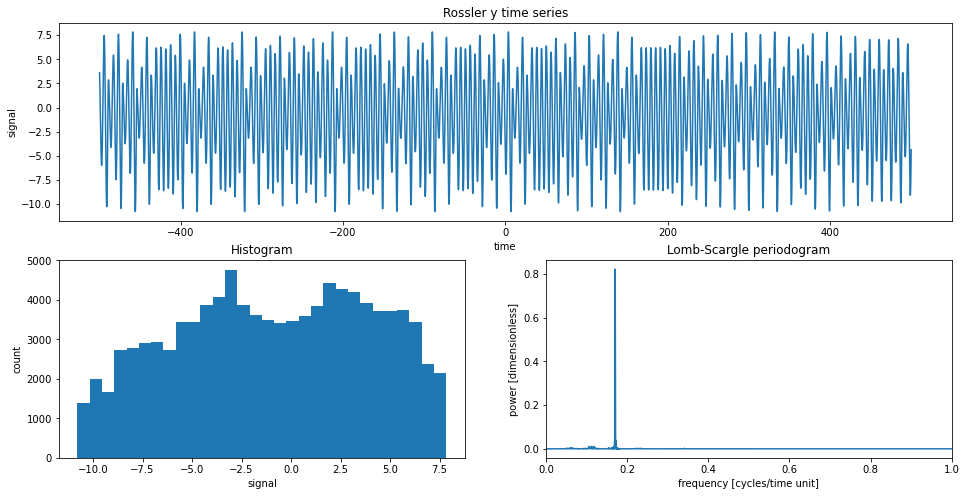

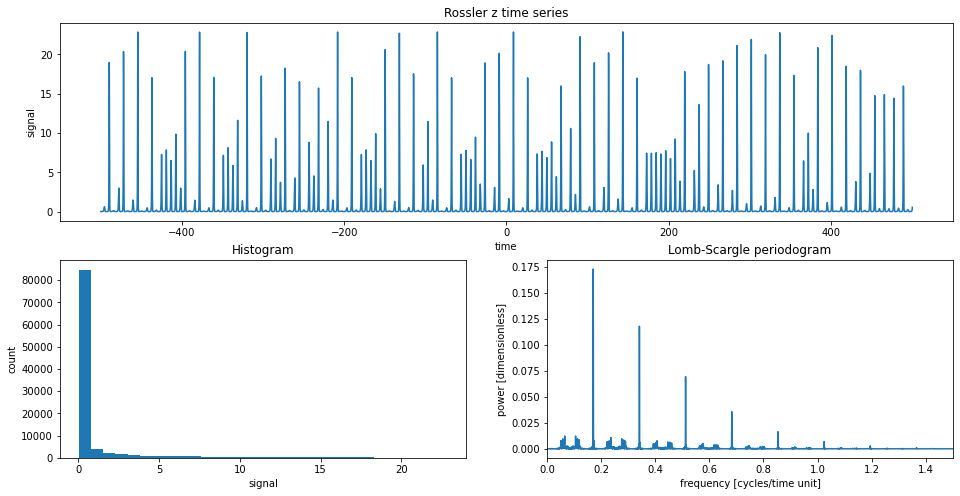

In [2]:
#r0 = np.array((0.1, -7, 0.1))
# just in case, to avoid transients, choose as IC the 5000th iteration of the above IC
r0 = np.array((-3.19582017,  3.64416763, 0.02384456))

# fixed point experiment 
# need to do it this way because it's very very sensitive to ICs. truncation error is enough to ruin it
# (both unstable! trajectories roll off and down to the attractor.)
fp1_x = 5.6929738
fp1_y = -28.46486898
fp1_z = 28.46486898
#r0 = np.array((fp1_x, fp1_y, fp1_z))

fp2_x = 0.0070262
fp2_y = -0.03513102
fp2_z = 0.03513102
#r0 = np.array((fp2_x, fp2_y, fp2_z))

dt = 0.01
tmin = -500.
tmax = 500.
baseline = tmax - tmin
Nsteps = int(baseline/dt)

rossler = RK45(fun=sp.Rossler_vel,t0=tmin,y0=r0,max_step=dt,t_bound=10000.)

rossler_r = np.empty((Nsteps,3))
rossler_t = np.empty((Nsteps))
for i in range(Nsteps):
    rossler.step()
    rossler_t[i] = rossler.t
    rossler_r[i] = rossler.y

print(rossler_r[5000])

fig, axes = plt.subplots(1,3,figsize=(18,6))
axes[0].plot(rossler_r[:,0],rossler_r[:,1],lw=0.5)
axes[0].set_xlim(-10,12)
axes[0].set_ylim(-11,9)
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[1].plot(rossler_r[:,0],rossler_r[:,2],lw=0.5)
axes[1].set_xlim(-10,12)
axes[1].set_ylim(-1,24)
axes[1].set_xlabel("x")
axes[1].set_ylabel("z")
axes[2].plot(rossler_r[:,1],rossler_r[:,2],lw=0.5)
axes[2].set_xlim(-11,9)
axes[2].set_ylim(-1,24)
axes[2].set_xlabel("y")
axes[2].set_ylabel("z")
plt.show()

sp.plotTimeSeries(rossler_t,rossler_r[:,0],min_freq=(1./baseline),max_freq=(1./(2.*dt)),LS_xlim=(0.,0.6),title="Rossler x")
sp.plotTimeSeries(rossler_t,rossler_r[:,1],min_freq=(1./baseline),max_freq=(1./(2.*dt)),LS_xlim=(0.,1.),title="Rossler y")
sp.plotTimeSeries(rossler_t,rossler_r[:,2],min_freq=(1./baseline),max_freq=(1./(2.*dt)),LS_xlim=(0.,1.5),title="Rossler z")

# rotated Rossler

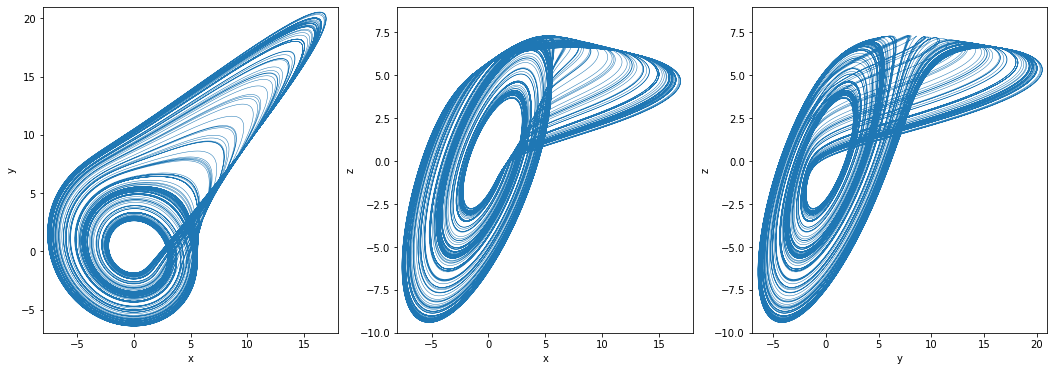

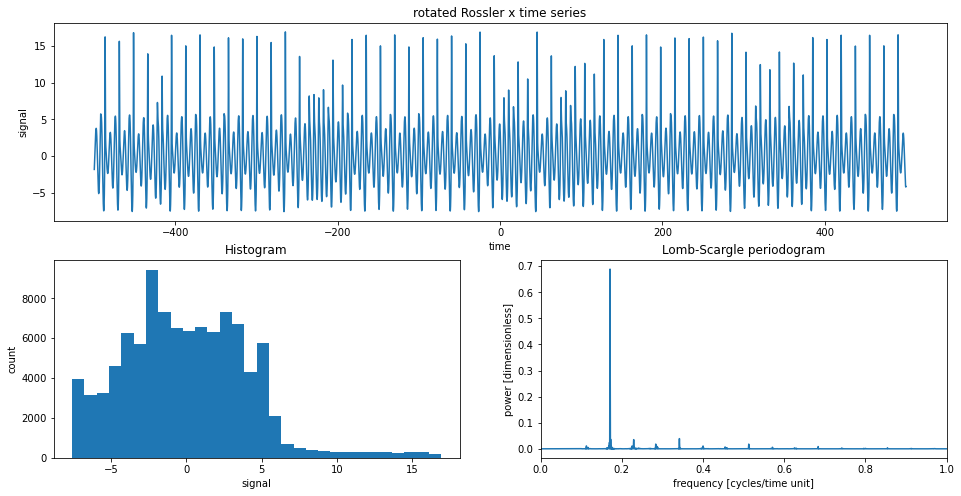

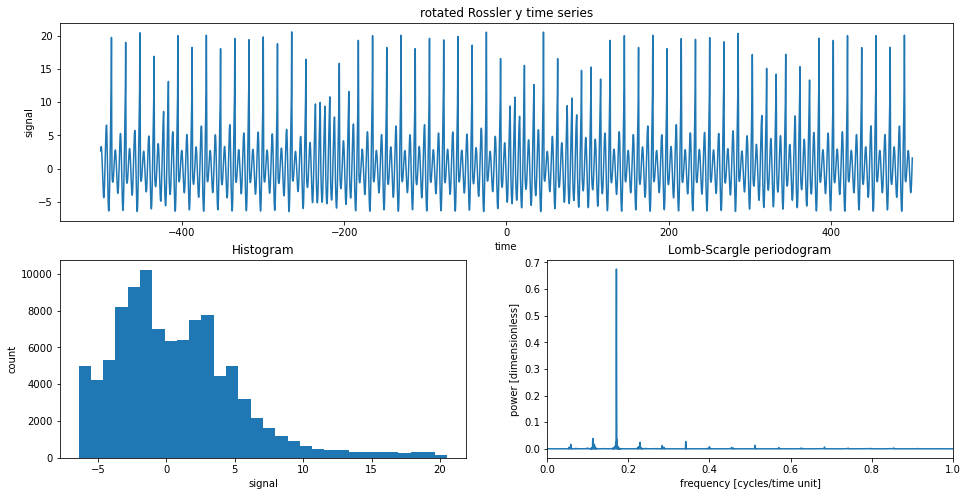

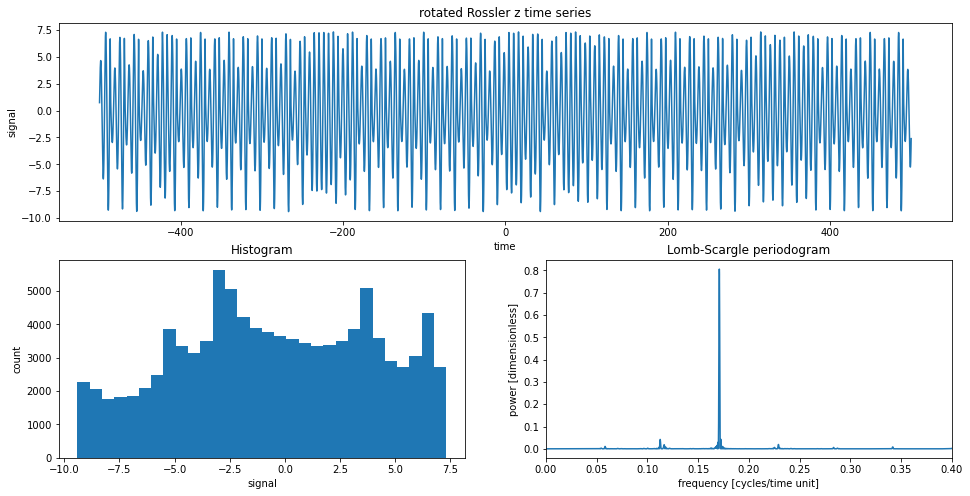

In [3]:
#r0 = (1./np.sqrt(2))*np.array((3.6+0.02, 0.02-3.2, -3.2+3.6))
# just in case, to avoid transients, choose as IC the 5000th iteration of the above IC
r0 = np.array((-1.86683832,  2.65479799,  0.69061283))

# fixed point experiment
# need to do it this way because it's very very sensitive to ICs. truncation error is enough to ruin it
# (both unstable! trajectories roll off and down to the attractor.)
fp1_x = 5.6929738
fp1_y = -28.46486898
fp1_z = 28.46486898
#r0 = (1./np.sqrt(2))*np.array((fp1_y + fp1_z, fp1_x+fp1_z, fp1_x+fp1_y))

fp2_x = 0.0070262
fp2_y = -0.03513102
fp2_z = 0.03513102
#r0 = (1./np.sqrt(2))*np.array((fp2_y + fp2_z, fp2_x+fp2_z, fp2_x+fp2_y))



dt = 0.01
tmin = -500.
tmax = 500.
baseline = tmax - tmin
Nsteps = int(baseline/dt)

rotated_rossler = RK45(fun=sp.rotated_Rossler_vel,t0=tmin,y0=r0,max_step=dt,t_bound=10000.)

rotated_rossler_r = np.empty((Nsteps,3))
rotated_rossler_t = np.empty((Nsteps))
for i in range(Nsteps):
    rotated_rossler.step()
    rotated_rossler_t[i] = rotated_rossler.t
    rotated_rossler_r[i] = rotated_rossler.y
    #print(i, rotated_rossler_r[i])
#print(rotated_rossler_r[5000])

fig, axes = plt.subplots(1,3,figsize=(18,6))
axes[0].plot(rotated_rossler_r[:,0],rotated_rossler_r[:,1],lw=0.5)
axes[0].set_xlim(-8,18)
axes[0].set_ylim(-7,21)
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[1].plot(rotated_rossler_r[:,0],rotated_rossler_r[:,2],lw=0.5)
axes[1].set_xlim(-8,18)
axes[1].set_ylim(-10,9)
axes[1].set_xlabel("x")
axes[1].set_ylabel("z")
axes[2].plot(rotated_rossler_r[:,1],rotated_rossler_r[:,2],lw=0.5)
axes[2].set_xlim(-7,21)
axes[2].set_ylim(-10,9)
axes[2].set_xlabel("y")
axes[2].set_ylabel("z")
plt.show()

sp.plotTimeSeries(rotated_rossler_t,rotated_rossler_r[:,0],min_freq=(1./baseline),max_freq=(1./(2.*dt)), LS_xlim=(0.,1.),title="rotated Rossler x")
sp.plotTimeSeries(rotated_rossler_t,rotated_rossler_r[:,1],min_freq=(1./baseline),max_freq=(1./(2.*dt)), LS_xlim=(0.,1.),title="rotated Rossler y")
sp.plotTimeSeries(rotated_rossler_t,rotated_rossler_r[:,2],min_freq=(1./baseline),max_freq=(1./(2.*dt)), LS_xlim=(0.,0.4),title="rotated Rossler z")

# Lorenz

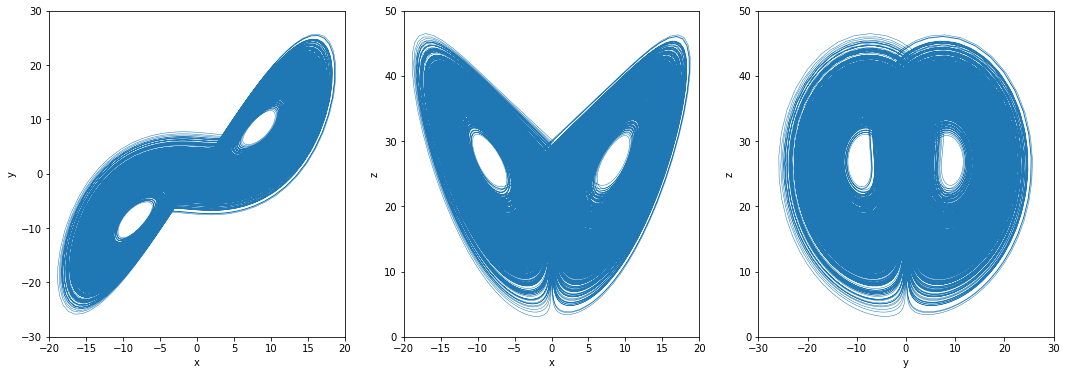

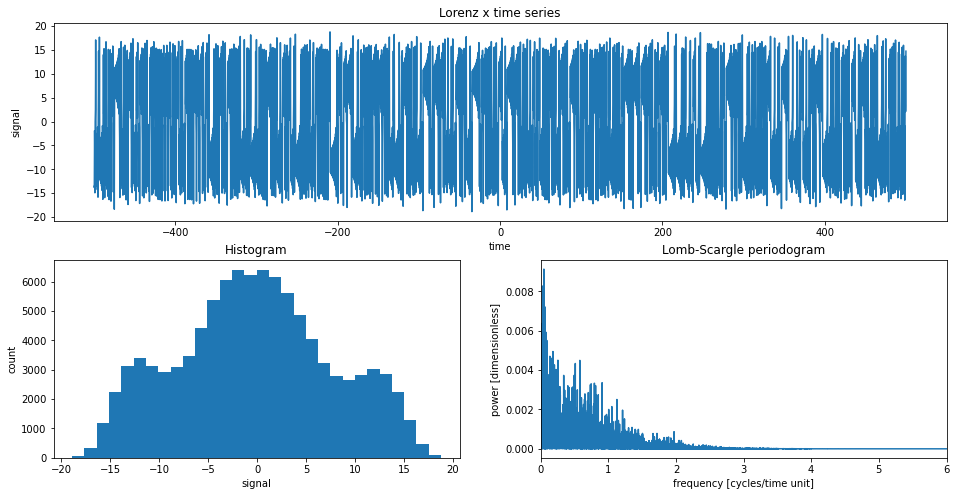

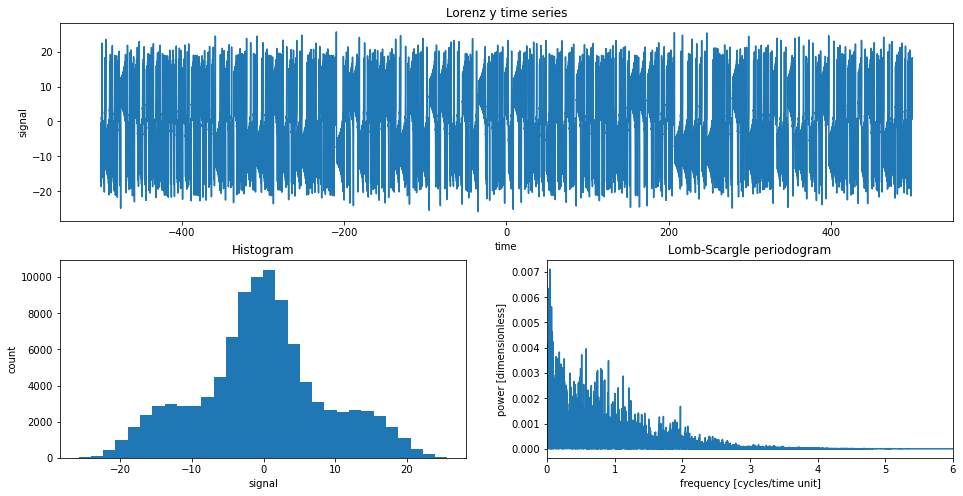

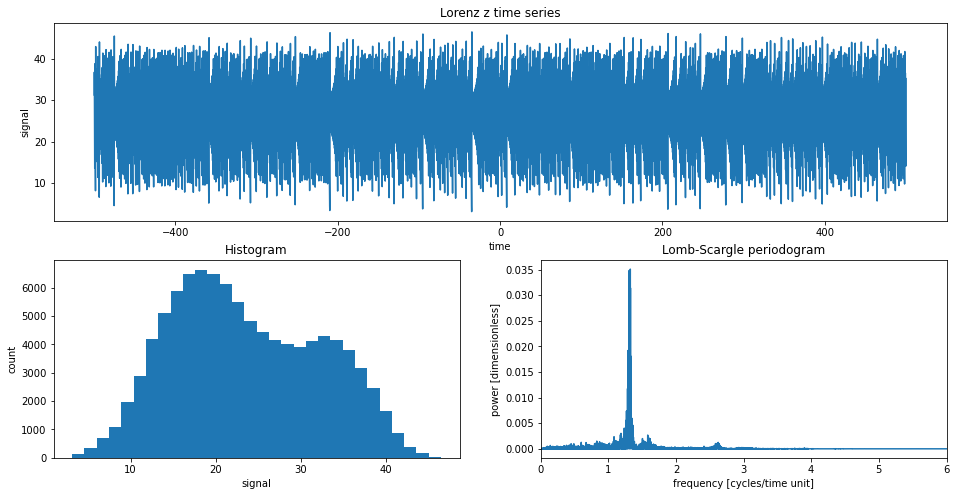

In [4]:
#r0 = np.array((1., 1., 1.))
# the above IC isn't yet on the attractor, has a brief transient; the below is chosen as the 5000th iteration of the above
# and seems to be safely on the attractor
r0 = np.array((-13.29390985, -16.32060497,  29.90864944))


#fixed point experiments
# because rho > 1, expect 2 fixed points (at the center of the lobes)
# points are both stable if rho < sigma * ((sigma + beta + 3)/(sigma - beta - 1))
# given the choice of parameters above, the RHS of that inequality is ~= 24.7
# so we expect the two FPs to be *unstable*.
fp1_x = 8.48528137
fp1_y = 8.48528137
fp1_z = 27.

fp2_x = -fp1_x
fp2_y = -fp1_y
fp2_z = fp1_z

#r0 = np.array((fp1_x, fp1_y, fp1_z))
#r0 = np.array((fp2_x, fp2_y, fp2_z))

dt = 0.01
tmin = -500.
tmax = 500.
baseline = tmax - tmin
Nsteps = int(baseline/dt)

lorenz = RK45(fun=sp.Lorenz_vel,t0=tmin,y0=r0,max_step=dt,t_bound=10000.)

lorenz_r = np.empty((Nsteps,3))
lorenz_t = np.empty((Nsteps))
for i in range(Nsteps):
    lorenz.step()
    lorenz_t[i] = lorenz.t
    lorenz_r[i] = lorenz.y


fig, axes = plt.subplots(1,3,figsize=(18,6))
axes[0].plot(lorenz_r[:,0],lorenz_r[:,1],lw=0.5)
axes[0].set_xlim(-20,20)
axes[0].set_ylim(-30,30)
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[1].plot(lorenz_r[:,0],lorenz_r[:,2],lw=0.5)
axes[1].set_xlim(-20,20)
axes[1].set_ylim(0,50)
axes[1].set_xlabel("x")
axes[1].set_ylabel("z")
axes[2].plot(lorenz_r[:,1],lorenz_r[:,2],lw=0.5)
axes[2].set_xlim(-30,30)
axes[2].set_ylim(0,50)
axes[2].set_xlabel("y")
axes[2].set_ylabel("z")
plt.show()

sp.plotTimeSeries(lorenz_t,lorenz_r[:,0],min_freq=(1./baseline),max_freq=(1./(2.*dt)),LS_xlim=(0.,6.),title="Lorenz x")
sp.plotTimeSeries(lorenz_t,lorenz_r[:,1],min_freq=(1./baseline),max_freq=(1./(2.*dt)),LS_xlim=(0.,6.),title="Lorenz y")
sp.plotTimeSeries(lorenz_t,lorenz_r[:,2],min_freq=(1./baseline),max_freq=(1./(2.*dt)),LS_xlim=(0.,6.),title="Lorenz z")

## What does MI vs tau look like for these systems?

In [5]:
print(np.shape(lorenz_r[0:5000]))

(5000, 3)


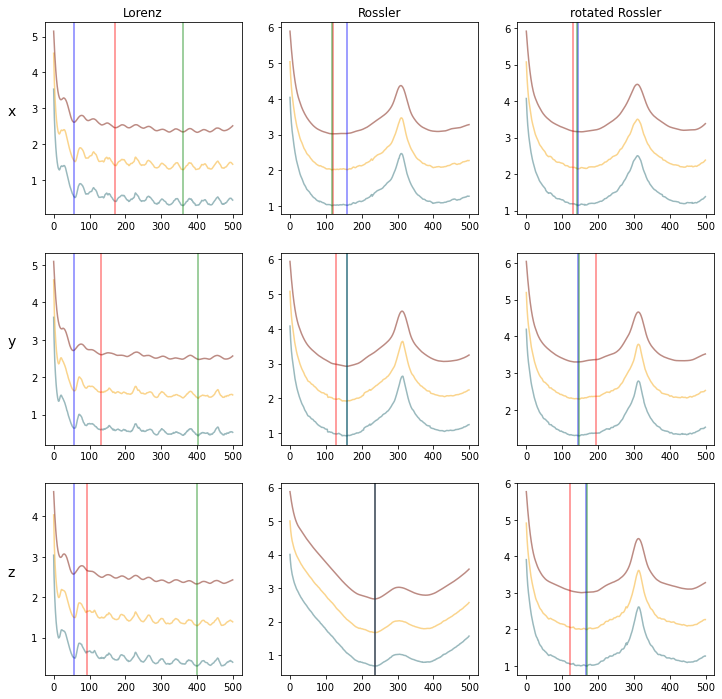

In [6]:
fig, axes = plt.subplots(3,3, figsize=(12,12))

systems = [lorenz_r[0:5000], rossler_r[0:5000], rotated_rossler_r[0:5000]]

for i in range(3):
    for j in range(3):
        trialDelayIndexMax = int(0.1*len(systems[i][:,j]))
        MI, fs86 = sp.FS86(timeSeries = systems[i][:,j], trialDelayIndices = np.arange(0,trialDelayIndexMax),
                           method="level_off_local_min", level_off_criterion=0.05, plot=False)
        
        MI, fs86_2 = sp.FS86(timeSeries = systems[i][:,j], trialDelayIndices = np.arange(0,trialDelayIndexMax),
                           method="local_min_stop_decreasing", plot=False)
        MI, global_min = sp.FS86(timeSeries = systems[i][:,j], trialDelayIndices = np.arange(0,trialDelayIndexMax),
                           method="global_min", plot=False)
        
        #smooth_MI_3 = sp.moving_average(MI,n=3)
        #smooth_MI_49 = sp.moving_average(MI,n=49)
        smooth_MI_5 = savgol_filter(MI, 5, 3) # window size 5, polynomial order 3
        smooth_MI_49 = savgol_filter(MI, 49, 3)
        
        axes[j,i].plot(MI,color="#36747d",alpha=0.5)
        axes[j,i].plot(smooth_MI_5+1,color="#f6aa1c",alpha=0.5)
        axes[j,i].plot(smooth_MI_49+2,color="#7a1809",alpha=0.5)
        #fs86, level_off_local_min
        axes[j,i].axvline(fs86, color='r',alpha=0.5)
        
        #fs86, local_min_stop_decreasing
        axes[j,i].axvline(fs86_2, color='b',alpha=0.5)

        #global min
        axes[j,i].axvline(global_min,color='g',alpha=0.5)
        #first local min of smoother
        #localMinima = argrelextrema(smooth_MI_49, np.less)
        
        #for lm in localMinima[0]:
        #    axes[j,i].axvline(lm, color='k',lw=0.5,zorder=0)
        
        #firstLocalMinIdx = localMinima[0][0]
        #check that smoothing didn't move the location of the local min
        #for k in np.arange(-5,5):
        #    if MI[firstLocalMinIdx + k] < MI[firstLocalMinIdx]:
        #        firstLocalMinIdx = firstLocalMinIdx + k
        #axes[j,i].axvline(firstLocalMinIdx, color='b',alpha=0.5)
        
axes[0,0].set_title("Lorenz")
axes[0,1].set_title("Rossler")
axes[0,2].set_title("rotated Rossler")

axes[0,0].set_ylabel("x",rotation=0,fontsize=14,labelpad=20)
axes[1,0].set_ylabel("y",rotation=0,fontsize=14,labelpad=20)
axes[2,0].set_ylabel("z",rotation=0,fontsize=14,labelpad=20)
plt.show()